In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import uncertainties as unc
import uncertainties.unumpy as unumpy

In [3]:

data = {
    'd': [0, 1.62, 1.62, 1.60, 1.60, 1.62, 1.62, 1.62, 1.62, 1.62, 1.62],
    'n': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Vi': [5.6, 5.49, 5.4, 5.33, 5.3, 5.27, 5.26, 5.26, 5.25, 5.25, 5.26],
    'Vo': [776, 724.5, 655.9, 590, 530, 482, 441, 406, 373, 344, 318],
    'dt': [-0.6, 0.24, 0.28, 0.8, 1.24, 1.64, 2.0, 2.32, 2.6, 2.84, 3.2]
}

df = pd.DataFrame(data)
df


,d,n,Vi,Vo,dt
0,0.00,0,5.60,776.0,-0.60
1,1.62,1,5.49,724.5,0.24
2,1.62,2,5.40,655.9,0.28
3,1.60,3,5.33,590.0,0.80
4,1.60,4,5.30,530.0,1.24
5,1.62,5,5.27,482.0,1.64
6,1.62,6,5.26,441.0,2.00
7,1.62,7,5.26,406.0,2.32
8,1.62,8,5.25,373.0,2.60
9,1.62,9,5.25,344.0,2.84


In [89]:
df['d'] = df['d']/1000
df['Vo'] = df['Vo']/1000
df['dt'] = df['dt']/1000

In [9]:
df

,d,n,Vi,Vo,dt
0,0.000000,0,5.60,0.7760,-0.00060
1,0.000002,1,5.49,0.7245,0.00024
2,0.000002,2,5.40,0.6559,0.00028
3,0.000002,3,5.33,0.5900,0.00080
4,0.000002,4,5.30,0.5300,0.00124
5,0.000002,5,5.27,0.4820,0.00164
6,0.000002,6,5.26,0.4410,0.00200
7,0.000002,7,5.26,0.4060,0.00232
8,0.000002,8,5.25,0.3730,0.00260
9,0.000002,9,5.25,0.3440,0.00284


In [90]:
frec=50.2
df['vo/vi'] = df['Vo']/df['Vi']
df['fase'] = 2*np.pi*frec*df['dt']
# Crear la fila 'h' que es la suma de las columnas anteriores  de 'd'
df['h'] = df['d'].cumsum()
errd = 0.02/1000
errVi = 0.01
errVo = 0.01
errdt = 0.01/1000

#df['err_vo/vi'] = df.apply(lambda row: unc.ufloat(row['Vo'], errVo) / unc.ufloat(row['Vi'], errVi), axis=1).apply(lambda x: x.s)
#df['err_fase'] = df.apply(lambda row: 2*np.pi*frec*unc.ufloat(row['dt'], errdt), axis=1).apply(lambda x: x.s)



df['err_h'] = (df['n'])*errd

In [91]:
# Calcular err_vo/vi utilizando incertidumbres
df['vo_with_err'] = unumpy.uarray(df['Vo'], errVo)
df['vi_with_err'] = unumpy.uarray(df['Vi'], errVi)
vo_vi_with_err = df['vo_with_err'] / df['vi_with_err']
df['err_vo/vi'] = unumpy.std_devs(vo_vi_with_err)

# Calcular err_fase utilizando incertidumbres
dt_with_err = unumpy.uarray(df['dt'], errdt)
fase_with_err = 2 * np.pi * frec * dt_with_err
df['err_fase'] = unumpy.std_devs(fase_with_err)


In [80]:
unumpy.uarray(df['Vo'][0], errVo) / unumpy.uarray(df['Vi'][0], errVi)

0.1385714285714286+/-0.0018027774426437456

In [77]:
from uncertainties import ufloat

v0 = ufloat(776/1000, 0.01)
vi = ufloat(5.6, 0.01)
v0/vi

0.1385714285714286+/-0.0018027774426437456

In [72]:
df

,d,n,Vi,Vo,dt,vo/vi,fase,h,ReH,ImH,err_vo/vi,err_fase,err_h,vo_with_err,vi_with_err,d_with_err
0,0.000000,0,5.60,0.7760,-0.00060,0.138571,-0.189250,0.000000,0.136097,-0.026068,0.000305,0.003154,0.00000,0.7760+/-0.0010,5.600+/-0.010,(0.0+/-2.0)e-05
1,0.000002,1,5.49,0.7245,0.00024,0.131967,0.075700,0.000002,0.131589,0.009980,0.000302,0.003154,0.00002,0.7245+/-0.0010,5.490+/-0.010,(0.2+/-2.0)e-05
2,0.000002,2,5.40,0.6559,0.00028,0.121463,0.088316,0.000003,0.120990,0.010713,0.000291,0.003154,0.00004,0.6559+/-0.0010,5.400+/-0.010,(0.2+/-2.0)e-05
3,0.000002,3,5.33,0.5900,0.00080,0.110694,0.252333,0.000005,0.107189,0.027636,0.000280,0.003154,0.00006,0.5900+/-0.0010,5.330+/-0.010,(0.2+/-2.0)e-05
4,0.000002,4,5.30,0.5300,0.00124,0.100000,0.391116,0.000006,0.092448,0.038122,0.000267,0.003154,0.00008,0.5300+/-0.0010,5.300+/-0.010,(0.2+/-2.0)e-05
5,0.000002,5,5.27,0.4820,0.00164,0.091461,0.517282,0.000008,0.079495,0.045229,0.000257,0.003154,0.00010,0.4820+/-0.0010,5.270+/-0.010,(0.2+/-2.0)e-05
6,0.000002,6,5.26,0.4410,0.00200,0.083840,0.630832,0.000010,0.067704,0.049450,0.000248,0.003154,0.00012,0.4410+/-0.0010,5.260+/-0.010,(0.2+/-2.0)e-05
7,0.000002,7,5.26,0.4060,0.00232,0.077186,0.731765,0.000011,0.057426,0.051575,0.000240,0.003154,0.00014,0.4060+/-0.0010,5.260+/-0.010,(0.2+/-2.0)e-05
8,0.000002,8,5.25,0.3730,0.00260,0.071048,0.820081,0.000013,0.048466,0.051950,0.000234,0.003154,0.00016,0.3730+/-0.0010,5.250+/-0.010,(0.2+/-2.0)e-05
9,0.000002,9,5.25,0.3440,0.00284,0.065524,0.895781,0.000015,0.040946,0.051154,0.000228,0.003154,0.00018,0.3440+/-0.0010,5.250+/-0.010,(0.2+/-2.0)e-05


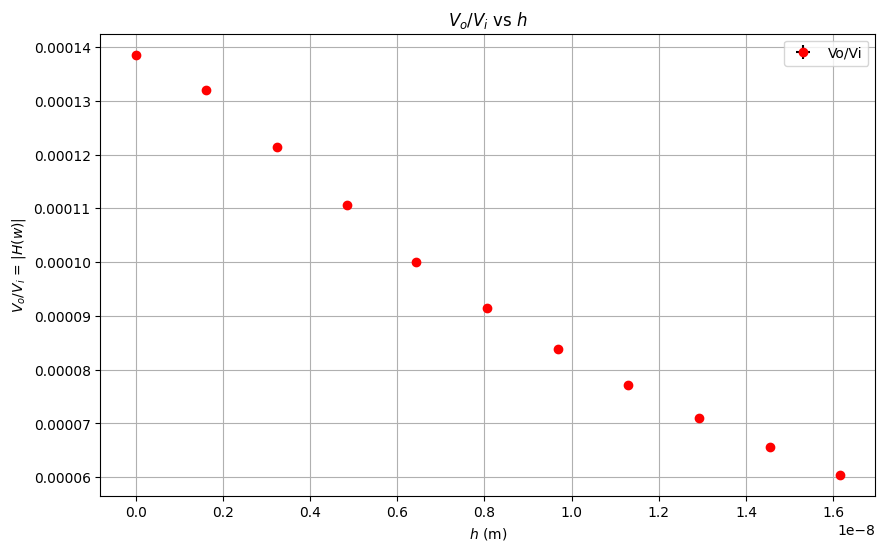

In [94]:
# Ploteo vo/vi vs h
plt.figure(figsize=(10, 6))
plt.errorbar(df['h'], df['vo/vi'], yerr=df['err_vo/vi']*0, xerr=df['err_h']*0, fmt='o', color='r',ecolor='black', zorder=2, label='Vo/Vi')
plt.title(f'$V_o/V_i$ vs $h$')
plt.xlabel(f'$h$ (m)')
plt.ylabel(f'$V_o/V_i$ = $|H(w)|$')
plt.grid()
#plt.ylim(0, 0.15)
plt.legend()
plt.show()


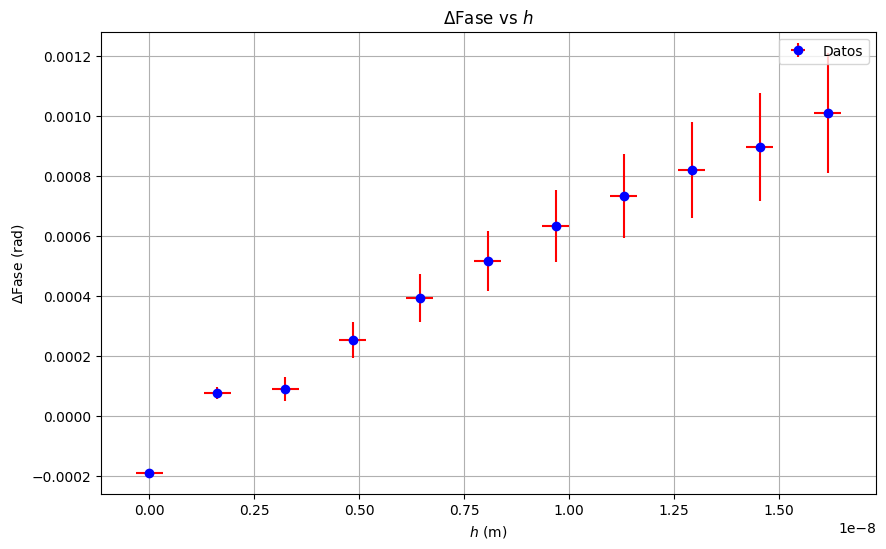

In [97]:
# Ploteo la fase vs h  
plt.figure(figsize=(10, 6))
#plt.scatter(df['h'], df['fase'], marker='o', color='b', zorder=2, label='Fase')
plt.errorbar(df['h'], df['fase'], yerr=df['err_h'], xerr=df['err_fase']*0.0000001, fmt='bo', ecolor='red', label='Datos')
plt.title(f'$\Delta$Fase vs $h$')
plt.xlabel(f'$h$ (m)')
plt.ylabel(f'$\Delta$Fase (rad)')
plt.grid()
plt.legend()
plt.show()

In [36]:
df['ReH'] = df['vo/vi']*np.cos(df['fase'])
df['ImH'] = df['vo/vi']*np.sin(df['fase'])

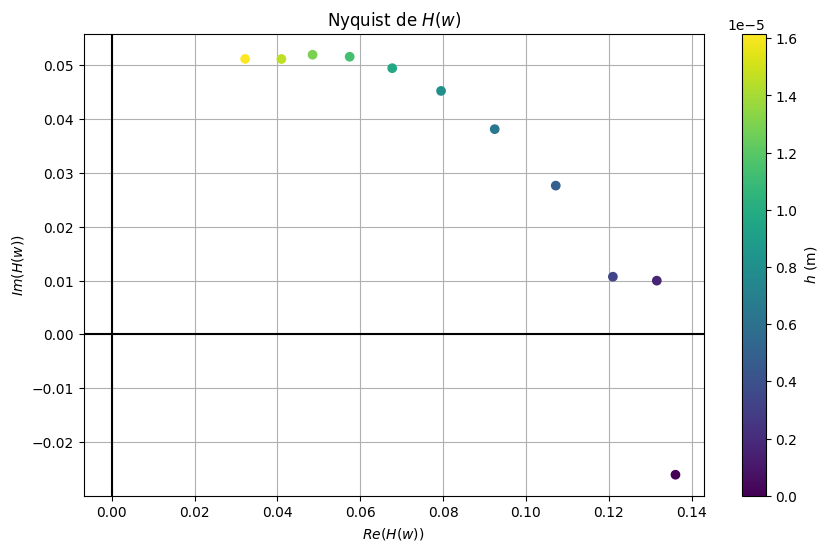

In [ ]:
# Plotear los datos
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['ReH'], df['ImH'], c=df['h'], cmap='viridis', marker='o', zorder=2)
plt.colorbar(scatter, label='$h$ (m)')
plt.title(f'Nyquist de $H(w)$')
plt.grid()
plt.xlabel(f'$Re(H(w))$')
plt.ylabel(f'$Im(H(w))$')
plt.axhline(0, color='black', lw=1.5, ls='-')
plt.axvline(0, color='black', lw=1.5, ls='-')
#plt.xlim(-0.2, 1)
#plt.ylim(-0.2, 1)
plt.show()

## Ajuste

In [98]:
import scipy.odr as ODR

In [128]:
x = df['h'][1:]
y = np.log(df['vo/vi'][1:])

def Ajuste(B, x):
    return -B[0]*x + B[1]

func = ODR.Model(Ajuste)
data = ODR.Data(x, y)
odr = ODR.ODR(data, func, beta0=[1, 1])
out = odr.run()
out.pprint()

Beta: [ 1.         -9.33222671]
Beta Std Error: [0.         0.08376021]
Beta Covariance: [[0.  0. ]
 [0.  0.1]]
Residual Variance: 0.07015772226559235
Inverse Condition #: 0.9999999999999999
Reason(s) for Halting:
  Problem is not full rank at solution
  Both sum of squares and parameter convergence


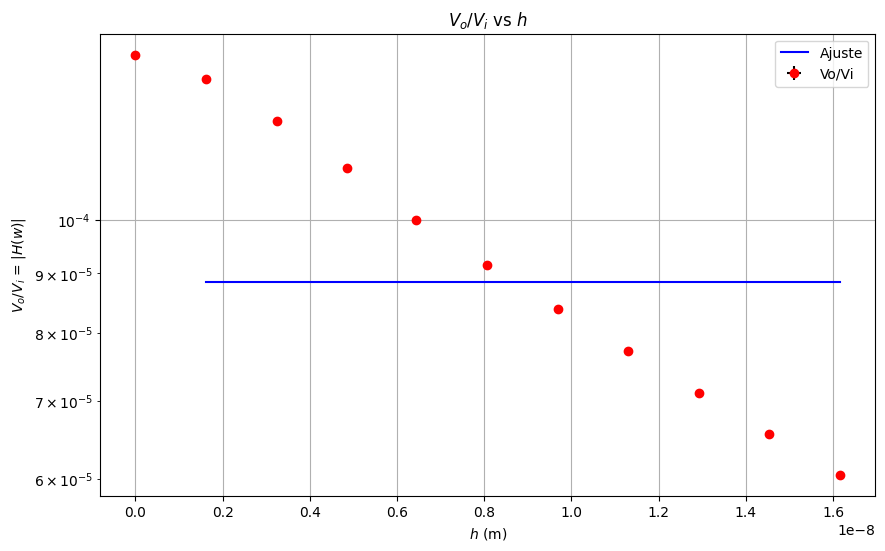

In [126]:
plt.figure(figsize=(10, 6))
plt.errorbar(df['h'], df['vo/vi'], yerr=df['err_vo/vi']*0, xerr=df['err_h']*0, fmt='o', color='r',ecolor='black', zorder=2, label='Vo/Vi')
#plt.plot(np.linspace(-25, -16, 100), Ajuste(out.beta, np.linspace(0, 1.7*10**(-8), 100)), 'b-', label='Ajuste')
#plt.plot(np.logspace(-25, -16, 100), Ajuste(out.beta, np.logspace(-25, -16,100)), 'b-', label='Ajuste')
plt.plot(x, np.exp(Ajuste(out.beta, x)), 'b-', label='Ajuste')
plt.title(f'$V_o/V_i$ vs $h$')
plt.xlabel(f'$h$ (m)')
plt.ylabel(f'$V_o/V_i$ = $|H(w)|$')
plt.grid()
#plt.ylim(0, 0.15)
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()